**Importing Libraries **

In [866]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import string
import nltk



**Importing Dataset**

In [867]:
Twitter_DataFrame = pd.read_csv('train.csv')# training dataset
Twitter_TestDataFrame = pd.read_csv('test.csv')# testing dataset

**Data Exploaration**

In [868]:
Twitter_DataFrame.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [869]:
# Size of the data #

Twitter_DataFrame.shape

# 31,962 - records and 2 independent features and 1 target variable

(31962, 3)

In [870]:
Twitter_DataFrame.describe

<bound method NDFrame.describe of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [871]:
# Understanding the sentiments in the data #

Twitter_DataFrame[Twitter_DataFrame['label']==0].head(15) 

# Class 0 : shows the list of positive sentiments

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [872]:
# Check the missing values # - Train

Twitter_DataFrame.isnull().sum()

# No missing values 

id       0
label    0
tweet    0
dtype: int64

In [873]:
# We can drop the ID column as it does not have any importance in builiding the model #

Twitter_DataFrame.drop(['id'],axis=1,inplace=True)
Twitter_DataFrame.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


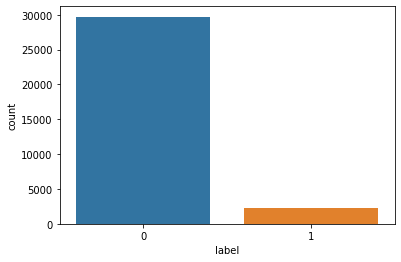

In [874]:
sns.countplot(Twitter_DataFrame['label'],label = 'count')

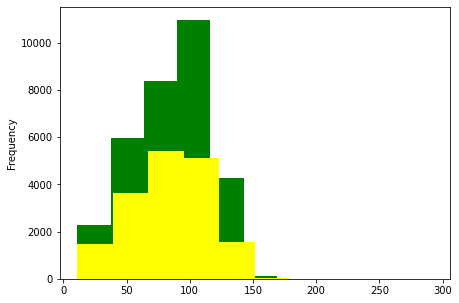

In [875]:
# checking the distribution of tweets in the data

Length_trainingDF = Twitter_DataFrame['tweet'].str.len().plot.hist(color = 'green', figsize = (7, 5))
Length_testingDF = Twitter_TestDataFrame['tweet'].str.len().plot.hist(color = 'yellow', figsize = (7, 5))


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 40')

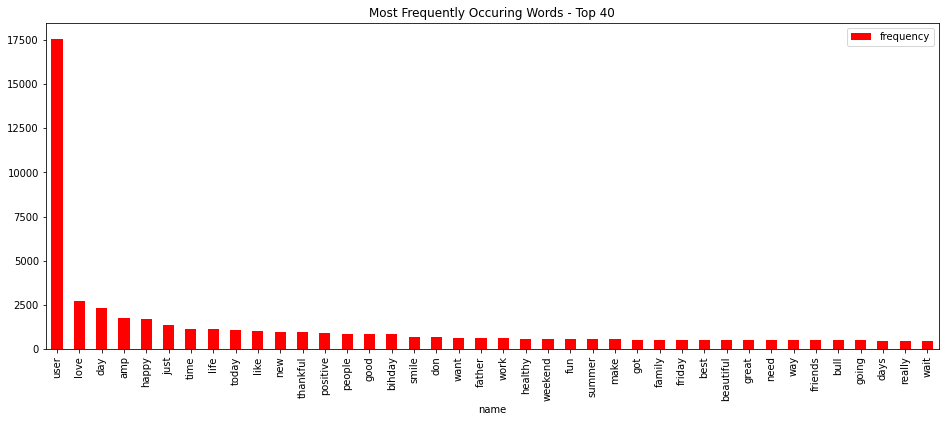

In [876]:
#Finding the most common words in every tweet
from sklearn.feature_extraction.text import CountVectorizer


Count_vectorizer = CountVectorizer(stop_words = 'english')
names = Count_vectorizer.fit_transform(Twitter_DataFrame.tweet)

sum_of_all_names = names.sum(axis=0)

words_freq = [(name, sum_of_all_names[0, k]) for name, k in Count_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency_of_name = pd.DataFrame(words_freq, columns=['name', 'frequency'])

frequency_of_name.head(40).plot(x='name', y='frequency', kind='bar', figsize=(16, 6), color = 'red')
plt.title("Most Frequently Occuring Words - Top 40")

Text(0.5, 1.0, 'WordCloud - Vocablary of all unique words')

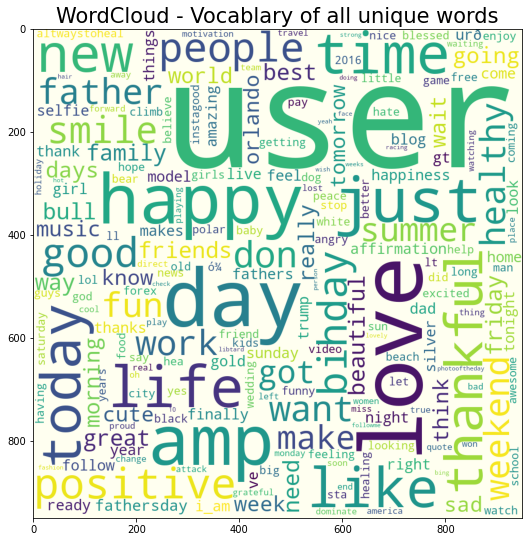

In [877]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'ivory', width = 950, height = 950).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(11,9))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocablary of all unique words", fontsize = 21)

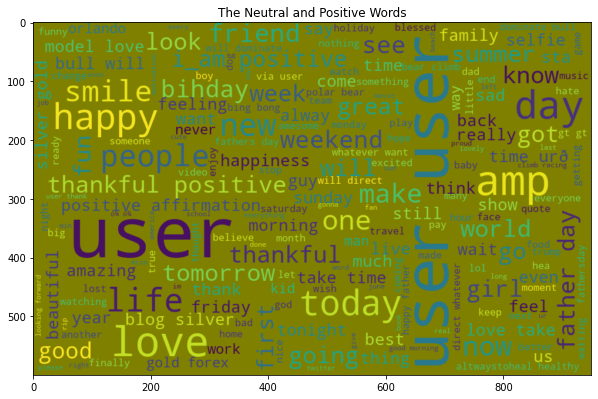

In [878]:
All_ordinaryWords =' '.join([text for text in Twitter_DataFrame['tweet'][Twitter_DataFrame['label'] == 0]])

wordcloud = WordCloud(background_color = 'olive',width=950, height=600, random_state = 0, max_font_size = 120).generate(All_ordinaryWords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.title('The Neutral and Positive Words')
plt.show()

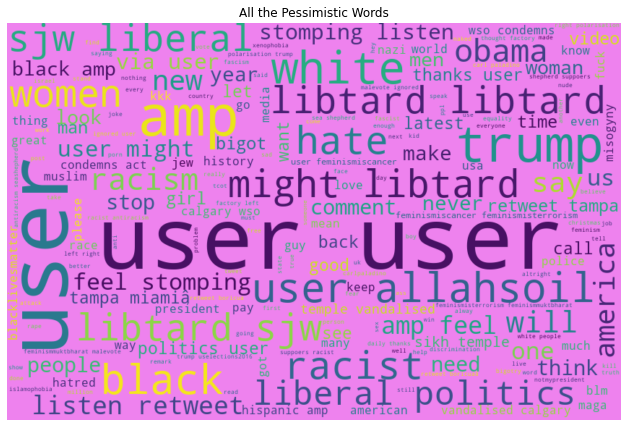

In [879]:
All_pessimistic_words =' '.join([text for text in Twitter_DataFrame['tweet'][Twitter_DataFrame['label'] == 1]])

wordcloud = WordCloud(background_color = 'violet', width=850, height=550, random_state = 0, max_font_size = 120).generate(All_pessimistic_words)
plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('All the Pessimistic Words')
plt.show()


*1*) **Preprocessing**

Convert every tweets to lower case

1.   Remove Twitter username

2.   Remove punctuations, numbers and special characters

3. Convert more than 2 letter repetitions to 2 letter ( example (wooooooow --> woow))
4. Remove extra spaces\

5. Remove URLs

6. Emoji analysis

7. Tokenization

8. Remove Stop words

9. Text Normalization (Stemming)




















**Handling emojis**

In [880]:
import re

def Clean_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [881]:
#Now we make a new column for side by side comparison of new tweets vs old tweets
Twitter_DataFrame['cleaned_tweet'] = np.vectorize(Clean_tweet)(Twitter_DataFrame['tweet'])
Twitter_DataFrame.head(15)

,label,tweet,cleaned_tweet
0,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can use cause they don...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model love take with all the time in urð ð ð ...
4,0,factsguide: society now #motivation,factsguide society now motivation
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they lea...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams ð c...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here it so gr


In [882]:
!pip install nltk

**Tokenization** : Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the **NLP**

In [883]:

import nltk
from nltk.tokenize import TweetTokenizer
def Tokenizing_tweets(Data_frame):
    Tokenizor = TweetTokenizer(strip_handles=True)
    Data_frame['cleaned_tweet']= Data_frame['cleaned_tweet'].apply(lambda x: Tokenizor.tokenize(x))
    print(Data_frame)
    

In [884]:

Tokenizing_tweets(Twitter_DataFrame)

       label  ...                                      cleaned_tweet
0          0  ...  [when, father, is, dysfunctional, and, is, so,...
1          0  ...  [thanks, for, lyft, credit, can, use, cause, t...
2          0  ...                            [bihday, your, majesty]
3          0  ...  [model, love, take, with, all, the, time, in, ...
4          0  ...             [factsguide, society, now, motivation]
...      ...  ...                                                ...
31957      0  ...  [ate, isz, that, youu, ð, ð, ð, ð, ð, ð, ð, ð,...
31958      0  ...  [to, see, nina, turner, on, the, airwaves, try...
31959      0  ...  [listening, to, sad, songs, on, monday, mornin...
31960      1  ...  [sikh, temple, vandalised, in, in, calgary, ws...
31961      0  ...                     [thank, you, for, you, follow]

[31962 rows x 3 columns]


**Removing Stopwords: **These are very common words that do not show any sentiment thus, they are no use of our model.*italicised text*


In [885]:
# Removal of StopWords fromt this text #

import nltk # Natural Language tool kit 

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [886]:
# we have to download stopwords Package to execute this command
from nltk.corpus import stopwords
All_stop_words = stopwords.words('english')
print(All_stop_words[:10])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [887]:
import nltk
from nltk.corpus import stopwords
Unique_stopWords=stopwords.words("english")
def stop_words(Data_frame):
    Data_frame['cleaned_tweet']=Data_frame['cleaned_tweet'].apply(lambda x: [j.lower() for j in x if j not in Unique_stopWords])
    print(Data_frame)

In [888]:
stop_words(Twitter_DataFrame)

       label  ...                                      cleaned_tweet
0          0  ...  [father, dysfunctional, selfish, drags, kids, ...
1          0  ...  [thanks, lyft, credit, use, cause, offer, whee...
2          0  ...                                  [bihday, majesty]
3          0  ...  [model, love, take, time, urð, ð, ð, ð, ð, ð, ...
4          0  ...                  [factsguide, society, motivation]
...      ...  ...                                                ...
31957      0  ...  [ate, isz, youu, ð, ð, ð, ð, ð, ð, ð, ð, ð, â, ï]
31958      0  ...  [see, nina, turner, airwaves, trying, wrap, ma...
31959      0  ...  [listening, sad, songs, monday, morning, otw, ...
31960      1  ...  [sikh, temple, vandalised, calgary, wso, conde...
31961      0  ...                                    [thank, follow]

[31962 rows x 3 columns]


In [889]:
#Removing punctuations and words of length less than 3

import re
def clean(Data_frame):
    Data_frame['cleaned_tweet']=Data_frame['cleaned_tweet'].apply(lambda x: [j for j in x if not re.match('[^\w\s]',j) and len(j)>3])
    print(Data_frame)

In [890]:
clean(Twitter_DataFrame)

       label  ...                                      cleaned_tweet
0          0  ...  [father, dysfunctional, selfish, drags, kids, ...
1          0  ...  [thanks, lyft, credit, cause, offer, wheelchai...
2          0  ...                                  [bihday, majesty]
3          0  ...                          [model, love, take, time]
4          0  ...                  [factsguide, society, motivation]
...      ...  ...                                                ...
31957      0  ...                                             [youu]
31958      0  ...  [nina, turner, airwaves, trying, wrap, mantle,...
31959      0  ...          [listening, songs, monday, morning, work]
31960      1  ...      [sikh, temple, vandalised, calgary, condemns]
31961      0  ...                                    [thank, follow]

[31962 rows x 3 columns]


In [891]:
Twitter_DataFrame

,label,tweet,cleaned_tweet
0,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, cause, offer, wheelchai..."
2,0,bihday your majesty,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,"[model, love, take, time]"
4,0,factsguide: society now #motivation,"[factsguide, society, motivation]"
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,[youu]
31958,0,to see nina turner on the airwaves trying to...,"[nina, turner, airwaves, trying, wrap, mantle,..."
31959,0,listening to sad songs on a monday morning otw...,"[listening, songs, monday, morning, work]"
31960,1,"@user #sikh #temple vandalised in in #calgary,...","[sikh, temple, vandalised, calgary, condemns]"


Stemming

In [892]:
# Applying the Stemming to reduce the word to its root form #

#Porter Stemmer : It is used to stem all the words ( inclduing the stopwords as well) so we have removed the stopwords as well
#We already know that a word has one root-base form but having different variations, for example, “play” is a root-base word and playing, played,
#plays are the different forms of a single word. So, these words get stripped out, they might get the incorrect meanings or some other sort of errors

import nltk
nltk.download('wordnet')
  
from nltk.stem import PorterStemmer
from textblob import Word
Pt = PorterStemmer()
def stemnlemm(Data_frame):
    Data_frame['cleaned_tweet']=Data_frame['cleaned_tweet'].apply(lambda x: [Word(Pt.stem(j)).lemmatize() for j in x])
    print(Data_frame)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [893]:
stemnlemm(Twitter_DataFrame)

       label  ...                                      cleaned_tweet
0          0  ...   [father, dysfunct, selfish, drag, kid, dysfunct]
1          0  ...  [thank, lyft, credit, caus, offer, wheelchair,...
2          0  ...                                  [bihday, majesti]
3          0  ...                          [model, love, take, time]
4          0  ...                        [factsguid, societi, motiv]
...      ...  ...                                                ...
31957      0  ...                                             [youu]
31958      0  ...  [nina, turner, airwav, tri, wrap, mantl, genui...
31959      0  ...                 [listen, song, monday, morn, work]
31960      1  ...          [sikh, templ, vandalis, calgari, condemn]
31961      0  ...                                    [thank, follow]

[31962 rows x 3 columns]


**Count Vectorizer**: It counts the number of times a word appears in a document and uses this value as its weight. The Count Vectorizer technique provides tokenization of the text documents and builds a vocabulary of words. Count Vectorizer counts words, so it returns integers

In [894]:
from sklearn.feature_extraction.text import CountVectorizer
Count_vectorizer = CountVectorizer(max_features=1000, analyzer='word', lowercase=False) 

In [895]:
Twitter_DataFrame['cleaned_tweet']=Twitter_DataFrame['cleaned_tweet'].apply(lambda X: " ".join(X) )


X_train = Count_vectorizer.fit_transform(Twitter_DataFrame['cleaned_tweet'])

In [896]:
print(Count_vectorizer.get_feature_names())# showing most occuring 1000 unique words

['abl', 'absolut', 'accept', 'account', 'act', 'action', 'actor', 'actual', 'adapt', 'adult', 'adventur', 'affect', 'affirm', 'afternoon', 'agre', 'ahead', 'aist', 'album', 'aliv', 'allahsoil', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'altwaystoh', 'alway', 'amaz', 'america', 'american', 'analyt', 'angel', 'anger', 'angri', 'anim', 'anniversari', 'announc', 'anoth', 'answer', 'anti', 'anxieti', 'anymor', 'anyon', 'anyth', 'appar', 'appl', 'appreci', 'around', 'arriv', 'asian', 'ask', 'attack', 'august', 'australia', 'avail', 'award', 'away', 'awesom', 'babi', 'back', 'balanc', 'ball', 'bday', 'beach', 'bear', 'beat', 'beauti', 'becom', 'beer', 'begin', 'behind', 'believ', 'benefit', 'best', 'bestfriend', 'besti', 'better', 'bigot', 'bihday', 'bike', 'bing', 'bird', 'bitch', 'black', 'blame', 'bless', 'block', 'blog', 'blogger', 'blond', 'blue', 'blur', 'board', 'bodi', 'bong', 'book', 'bore', 'born', 'bought', 'boy', 'boyfriend', 'brand', 'break', 'breakfast', 'brexit', '

In [897]:
tweets = pd.DataFrame(X_train.toarray())
tweets
#31961 are the number of tweets and 1000 is the number of features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [898]:
Y_train=pd.DataFrame(Twitter_DataFrame['label'])
Y_train.head(10)


,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Splitting dataset!

In [899]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

In [900]:
from sklearn.naive_bayes import MultinomialNB
z=MultinomialNB()
z.fit(x_train,y_train)

pred=z.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Classifier

In [901]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,pred)
print(cm)
score = accuracy_score( y_test, pred)
print(score)
F1_score = classification_report(y_test, pred)
print(F1_score)


[[8643  293]
 [ 317  336]]
0.9363854416518927
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8936
           1       0.53      0.51      0.52       653

    accuracy                           0.94      9589
   macro avg       0.75      0.74      0.75      9589
weighted avg       0.94      0.94      0.94      9589



K Nearest Neibour classifier

In [902]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

#predicting test results
pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [903]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred)
print(cm)
score = accuracy_score( y_test, pred)
print(score)
F1_score = classification_report(y_test, pred)
print(F1_score)


[[8828  108]
 [ 433  220]]
0.9435811867765147
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8936
           1       0.67      0.34      0.45       653

    accuracy                           0.94      9589
   macro avg       0.81      0.66      0.71      9589
weighted avg       0.93      0.94      0.93      9589



Logistic Regression

In [904]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

#predicting test results
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [905]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred)
print(cm)
score = accuracy_score( y_test, pred)
print(score)
F1_score = classification_report(y_test, pred)
print(F1_score)


[[8828  108]
 [ 433  220]]
0.9435811867765147
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8936
           1       0.67      0.34      0.45       653

    accuracy                           0.94      9589
   macro avg       0.81      0.66      0.71      9589
weighted avg       0.93      0.94      0.93      9589



Support Vector Machine

In [906]:
from sklearn.svm import SVC
classifier= SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [907]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
score = accuracy_score( y_test, y_pred)
print(score)
F1_score = classification_report(y_test, pred)
print(F1_score)



[[8896   40]
 [ 393  260]]
0.9548440921889665
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8936
           1       0.67      0.34      0.45       653

    accuracy                           0.94      9589
   macro avg       0.81      0.66      0.71      9589
weighted avg       0.93      0.94      0.93      9589

